# Büyük Veride Makine Öğrenmesi

In [15]:
import findspark
findspark.init("/Users/necmiyesoyla/spark/spark-3.3.2-bin-hadoop3")

import pyspark
from pyspark.conf import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

spark=SparkSession.builder\
    .master("local")\
    .appName("ml_spark")\
    .getOrCreate()

sc=spark.sparkContext
sc

<SparkContext master=local appName=ml_spark>

In [16]:
s_df=spark.read.csv("churn.csv", header=True, inferSchema=True, sep=",")
s_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [17]:
s_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [20]:
s_df.show(10)
#hocam elimizde müşterilerle ilgili bir veri seti var. müşterini bizi terk edip etmeyeceğini bulmaya çalışıyoruz

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|  5|Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|  6|     Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|  7|   Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|  8|     Ashlee Carr|43.0|       14062.6|              1| 5.46|     11.0|    1|
|  9|  Jennifer Lynch|40.0| 

In [26]:
#değişken isimlerini belirli bir standartta tuttmak mantıklı olur. hadi bizde tüm değişken isimlerini küçük harli yapalım
s_df=s_df.toDF(*[itr.lower() for itr in s_df.columns])
s_df.show(5)

#bu yöntem saprk df için geçerli aynı işşşlemi pandas df'de yapmak istersen
#df.columns(str.lower,df.columns) evet daha kolay daat frame işlemlerinin pandas daha gelişmiş olduğunu söylemiştik :)) 

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [27]:
#yine data setimizz üzerinden daah rahat işlme yapabilmemiz değişiklik yapmaya aslında kişiselleştirmeye devam ediyoruz.
#_c0 ismi çok saçma aslında index 'i tutuyır yekten index diyelim :)

s_df=s_df.withColumnRenamed("_c0","index")
s_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 3 rows



In [35]:
print("Gözlem sayısı:",s_df.count())#gözlem sayısı
print("değişken sayısı:",len(s_df.columns))#değişken sayısı
print("ve değişkn isimleri:")
s_df.columns#değişkneler

Gözlem sayısı: 900
değişken sayısı: 8
ve değişkn isimleri:


['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [37]:
#gerçek bi rproje üstünde çalışır gibi ileliyoruz
#bu ilemlerden sonra dat sette isimsiz gözlme varmı yani tekrarlı gözlem var mı diye kontrol ederiz

s_df.distinct().count()
#ops 900 mü?

900

In [60]:
print("year:",s_df.select("years").distinct().count())
print("age:",s_df.select("age").distinct().count())
print("num_sites:",s_df.select("num_sites").distinct().count())
print("total_purchase:",s_df.select("total_purchase").distinct().count())


#olmadı yeaars değişkeninden kaynaklı olabilr mi demiştim
#birde names'e bakalım belki aynı isimli müşteriler vardır

year: 418
age: 36
num_sites: 12
total_purchase: 900


In [56]:
print(s_df.select("names").distinct().count())
#hm isim değişkenşnden kaynaj-klıumış

899


In [53]:
#peki aklımıza bir kurt düştü bunlr gerçekten isim benzerliği olna müşteriler mi? yoksa tekrar eden gözlemler mi?
#bunu için isime göre gruplayalım
#isimlere göre grupluyoruz sonra sıralıyoruz 
s_df.groupBy("names").count().sort("count", ascending=False).show(5)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|    Patrick Bell|    1|
|   Chelsea Marsh|    1|
|Patrick Robinson|    1|
|     John Barber|    1|
+----------------+-----+
only showing top 5 rows



In [55]:
s_df.filter(s_df.names=="Jennifer Wood").show()
#evet sorun yok isim benzerliği

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [64]:
s_df.groupBy("age").count().sort("count", ascending=False).show(5)
#aynı yaşt insanalrın oması çokt aönemli değil sorun yok yani

+----+-----+
| age|count|
+----+-----+
|41.0|   69|
|43.0|   59|
|40.0|   58|
|45.0|   56|
|44.0|   53|
+----+-----+
only showing top 5 rows



In [70]:
#peki farz edelim ki spesifik olarak belli bir değişknedeki tekrarlayanları silmek istiyoruz hadi bakalım 

s_df.select("names").dropDuplicates()

s_df.select("names").dropDuplicates().groupby("names").count().sort("count",ascending=False).show(3)

#ilk satırda aslında silme işlemini yaptık ama kayıt etmediğimiz için gerçekten 
#silip silmediğ,n, görmek için aymı kodu tekrar yasıp devamona da görmemizi sağlayac kodu ekledik 

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [82]:
s_df.select("age").dropDuplicates()

s_df.select("age").dropDuplicates().groupby("age").count().sort("count",ascending=False).show(5)

s_df.select("age").dropDuplicates().count()#sadece 36 gözlem kalmış :))

+----+-----+
| age|count|
+----+-----+
|49.0|    1|
|29.0|    1|
|47.0|    1|
|42.0|    1|
|44.0|    1|
+----+-----+
only showing top 5 rows



36

In [83]:
#Codun anlam ve önemi Hocam muhakkak duplicate gözlme avrnı diye kontrol edelim

In [84]:
#peki birde belirli bir indise veya belirli indisden belirli bir değişkene ulaşma gereksiniminde ne yaparoz ona bakalım

In [89]:
s_df.where(s_df.index==100).show()#22.indexteki kişiye eriştik

+-----+------------+----+--------------+---------------+-----+---------+-----+
|index|       names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+------------+----+--------------+---------------+-----+---------+-----+
|  100|Chelsea Ward|43.0|      12104.25|              0| 5.86|      7.0|    1|
+-----+------------+----+--------------+---------------+-----+---------+-----+



In [91]:
s_df.where(s_df.index==100).select("names").show()
#sadece ismine eriştik

+------------+
|       names|
+------------+
|Chelsea Ward|
+------------+



In [99]:
#hocam seçtiğimiz veriyi alıp işlenebilr hala getirdik
#bu normalde zor bir işlem. Spark data farmeden veriyi kandi tipind eişlnebilir halde almak. bunu bize sağlayan metod görüldiği collect() Teşkkkürler collect()👏🏻
#yınıdaki [0] index işareti herzaman 0 oluyor am neden bende bilmiyorum
x=s_df.where(s_df.index==100).collect()[0]["age"]

In [97]:
type(x)

float

# Veri Analizi

In [100]:
# veri setini nasıl tanır nasıl yorumlarız?

In [101]:
#öncelikle istatsitiklerine bakalım

s_df.describe().show()

#oyy fehimee bu ne çirkinlik

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [105]:
#istatistik kısmını daha güzel görebilmek için pandas'tan faydalanıyoruz

s_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

#çiçek gibi oldu. Hadi yorumlayalım

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [115]:
#churn ve account_manager var yok şeklinde(kategorik, sadece 0 1 değerlerinden oluşan) bir değişken olduğunu anlıyoruz
#ancak chur'nün ortalamaası 0'a yakın olduğu içn sınıf içinde düzensiz bir dağilim olduğunu söyleyebiliriz. 0lar ciddi orandan ağırlıkta yani :)) denge yok
#churn şirketimizden müşterinin ayrılması

In [111]:
print(s_df.filter(s_df.age<35).count())
print(s_df.filter(s_df.age<30).count())


100
19


In [109]:
print("1:",s_df.filter(s_df.churn==1).count())
print("0:",s_df.filter(s_df.churn==0).count())

1: 150
0: 750


In [112]:
#yukarıdaki işlemler belirli değişknelri filtreleyerek ulaşmak içn hemen bir üzttekşnin yapmanın bir kolya yalo daha var gruplamak
#sadce iki değer aldığı için fşltrelem ve gruplamakta aynı sonucu alırız

s_df.groupBy("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [114]:
#ilişkiye bakalım
s_df.groupBy("churn").agg({"age":"mean"}).show()

+-----+-----------------+
|churn|         avg(age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



In [116]:
#hadi çaprazlama  göreselleştirme işlemleriyle değişkmnelrşn birbirlei arasındaki ilişkiye bakalım
#evet aslında bu işlemleri ml kendisi yapar ancak gerçekten veri ile ilginiyprsak veri yi makine den dah iyi bilmliyiz ki öğretebilelim:))

In [118]:
p_df=s_df.drop("index","names").toPandas()

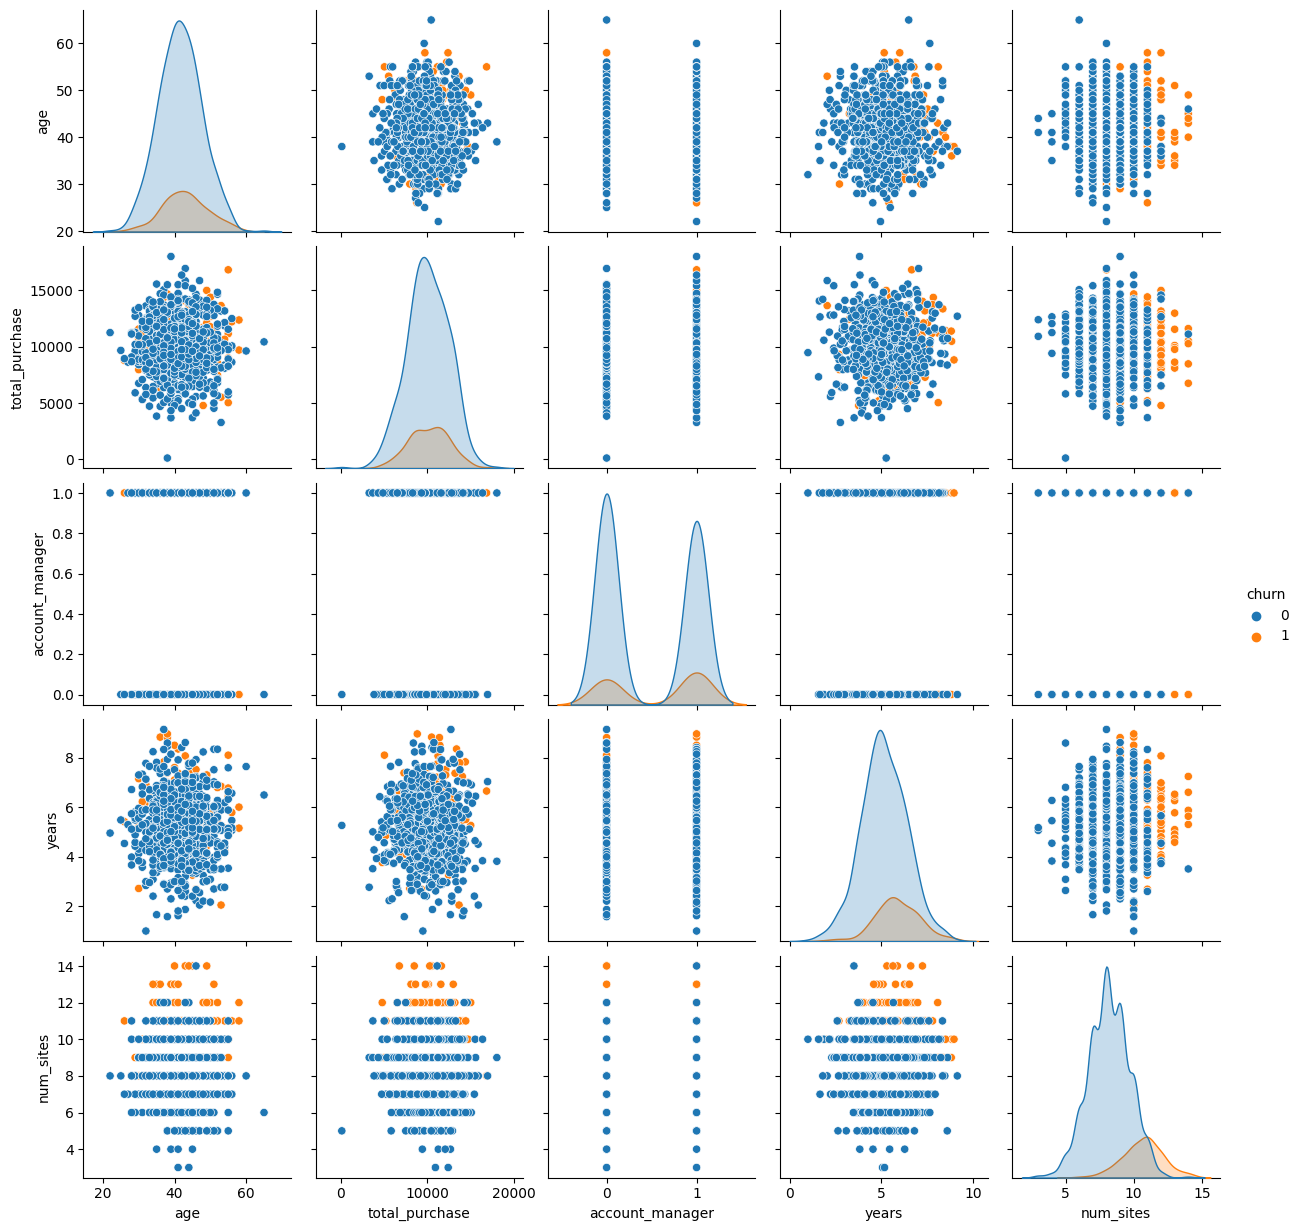

In [120]:
import seaborn as sns
sns.pairplot(p_df,hue="churn")

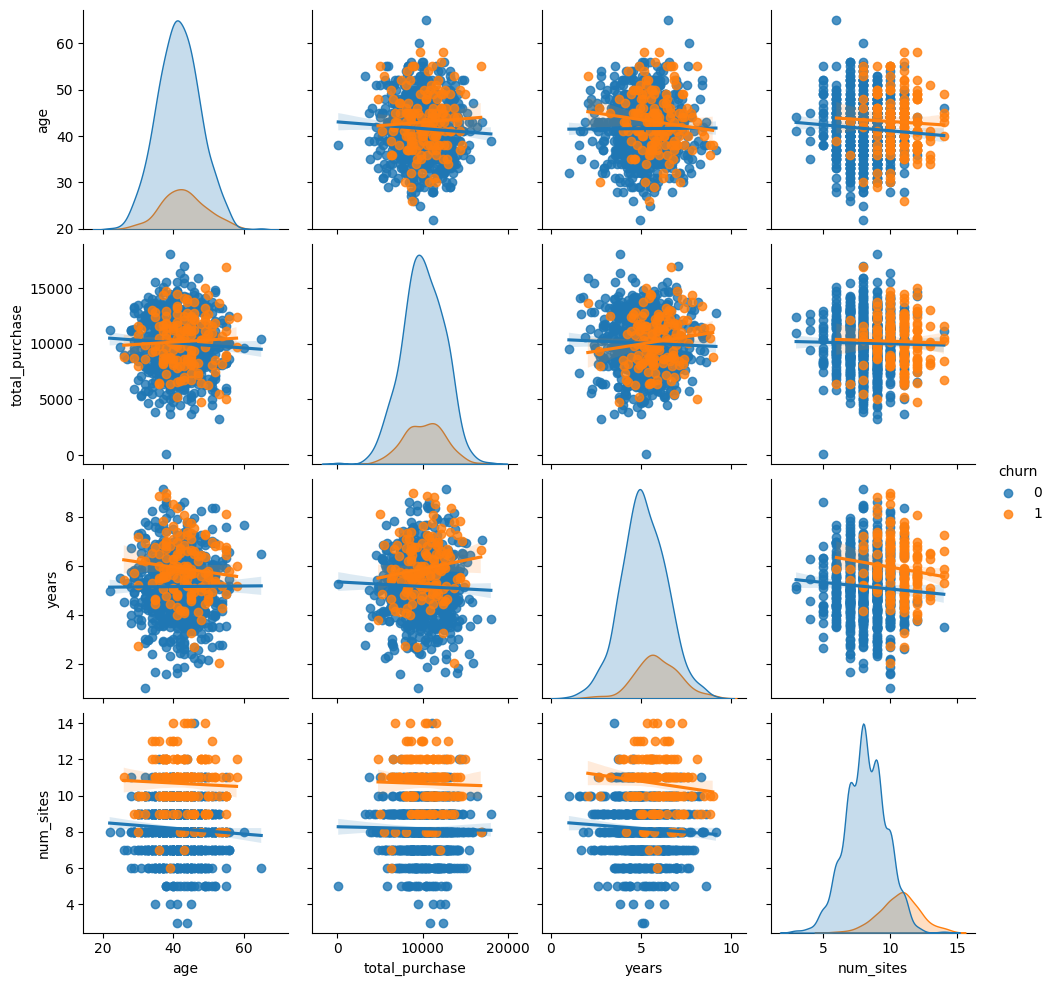

In [127]:
sns.pairplot(p_df,
            hue="churn",
            vars=["age","total_purchase","years","num_sites"],
            kind="reg");

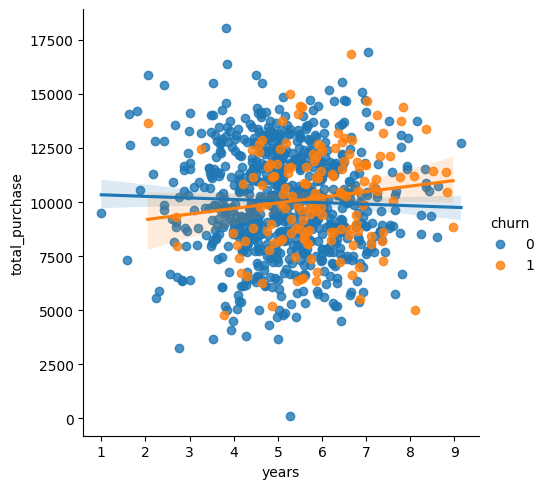

In [133]:
#buradaki amacımımz koralasyondan ziyade etki düzeti 
#mesala yıl ve satın alma arasında: yılın artmas satın almayı churn olacak müşterilerde arttırırken, churn olmayacak müşterilerde azaltıyor :)) çok ilginç

sns.lmplot(data=p_df,y="total_purchase",x="years",hue="churn")